<a href="https://colab.research.google.com/github/sudo-KingJahad/midterm-machine-learning/blob/main/midterm_transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=da39ccb4-029b-4a4b-b966-39de5df0afdb
To: /content/midterm_folder/test_transaction.csv
100% 613M/613M [00:10<00:00, 59.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA
From (redirected): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA&confirm=t&uuid=34a3d094-92bd-46b5-9f85-a9ce11099760
To: /content/midterm_folder/train_transaction.csv
100% 683M/683M [00:10<00:00, 63.4MB/s]
Download completed


In [2]:
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = "/content/drive/MyDrive/midterm_folder"  # sesuaikan jika perlu

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import a as pl

BASE_PATH = "midterm_folder"

train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

print(train_transaction.shape) #590540 row dan 393 feature + 1 target
print(test_transaction.shape) #506691 row dan 393 feature

(590540, 394)
(506691, 393)


In [ ]:
train_transaction.head() #isFraud adalah target featurenya

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3663549,18403224,31.95,"""W""",10409,111.0,150.0,"""visa""",226.0,"""debit""",170.0,87.0,1.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,null,null,…,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663550,18403263,49.0,"""W""",4272,111.0,150.0,"""visa""",226.0,"""debit""",299.0,87.0,4.0,null,"""aol.com""",null,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,null,null,…,0.0,0.0,1.0,0.0,280.0,77.0,0.0,280.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663551,18403310,171.0,"""W""",4476,574.0,150.0,"""visa""",226.0,"""debit""",472.0,87.0,2635.0,null,"""hotmail.com""",null,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,null,null,…,0.0,0.0,1.0,0.0,1321.0,0.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663552,18403310,284.95,"""W""",10989,360.0,150.0,"""visa""",166.0,"""debit""",205.0,87.0,17.0,null,"""gmail.com""",null,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663553,18403317,67.95,"""W""",18018,452.0,150.0,"""mastercard""",117.0,"""debit""",264.0,87.0,6.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,null,null,…,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


Langkah 1: Mount Drive & Import Library

Penjelasan: Seperti sebelumnya, kita hubungkan Google Drive. Kita memanggil library standar (Pandas, Numpy). Khusus untuk kasus ini, kita memanggil metrik evaluasi yang spesifik untuk data tidak seimbang:

* ROC-AUC Score: Mengukur seberapa baik model membedakan positif (Fraud) dan negatif (Normal).
* Confusion Matrix: Untuk melihat berapa banyak yang False Negative (Fraud tapi lolos).
* Classification Report: Untuk melihat Precision dan Recall.

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc # Garbage Collector untuk menghemat RAM

# Library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve

# 1. Mount Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Langkah 2: Memuat Dataset (Train & Test)

Penjelasan: Dataset Fraud biasanya sangat besar.

1. Kita muat train_transaction.csv (Data untuk belajar, ada jawaban isFraud).
2. Kita muat test_transaction.csv (Data ujian, tidak ada jawaban isFraud). Catatan: Untuk demo ini, jika RAM Colab penuh, Anda bisa membatasi jumlah baris dengan menambahkan parameter nrows=50000 di dalam pd.read_csv.

In [3]:
# GANTI path sesuai lokasi file Anda di Google Drive
path_train = '/content/drive/MyDrive/midterm_folder/train_transaction.csv'
path_test = '/content/drive/MyDrive/midterm_folder/test_transaction.csv'

# Memuat data (Gunakan nrows=50000 jika Colab crash karena memori penuh)
print("Sedang memuat data train...")
train_df = pd.read_csv(path_train, nrows=100000) # Sample 100k baris agar cepat
print("Sedang memuat data test...")
test_df = pd.read_csv(path_test, nrows=50000)

print(f"Ukuran Train: {train_df.shape}")
print(f"Ukuran Test : {test_df.shape}")

# Cek seberapa tidak seimbangnya data (Class Imbalance)
print("\nDistribusi Target (isFraud):")
print(train_df['isFraud'].value_counts(normalize=True))

Sedang memuat data train...
Sedang memuat data test...
Ukuran Train: (100000, 394)
Ukuran Test : (50000, 393)

Distribusi Target (isFraud):
isFraud
0    0.97439
1    0.02561
Name: proportion, dtype: float64


Langkah 3: Data Preprocessing (Cleaning & Encoding)

Penjelasan: Data transaksi mentah memiliki campuran angka dan teks (seperti jenis kartu 'visa', 'mastercard'). Komputer hanya mengerti angka.

1. Handling Missing Values: Dataset fraud seringkali bolong-bolong. Kita isi nilai kosong numerik dengan -999 (teknik umum di fraud detection agar model tahu itu data hilang) atau rata-rata.

2. Encoding: Mengubah teks menjadi angka menggunakan LabelEncoder.

3. Penyelarasan: Pastikan kolom di Data Train dan Data Test sama persis.

In [4]:
# Hapus TransactionID karena itu hanya nomor urut (tidak berguna untuk prediksi)
train_df = train_df.drop('TransactionID', axis=1)
test_ids = test_df['TransactionID'] # Simpan ID test untuk file submisi nanti
test_df = test_df.drop('TransactionID', axis=1)

# Identifikasi kolom Kategorikal (Teks) dan Numerik
cat_cols = train_df.select_dtypes(include=['object']).columns
num_cols = train_df.select_dtypes(exclude=['object']).columns
# Hapus target 'isFraud' dari daftar kolom numerik
num_cols = num_cols.drop('isFraud') if 'isFraud' in num_cols else num_cols

print(f"Memproses {len(cat_cols)} fitur kategori dan {len(num_cols)} fitur numerik...")

# 1. Encoding Kategorikal (Ubah teks jadi angka)
for col in cat_cols:
    le = LabelEncoder()
    # Ubah jadi string dulu untuk handle NaN, lalu fit
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

    # Gabung sebentar untuk fitting agar semua label tercover
    le.fit(pd.concat([train_df[col], test_df[col]]))
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# 2. Handling Missing Values Numerik (Isi dengan -999)
# Mengapa -999? Di tree-based model, ini memisahkan data hilang dari data asli.
train_df[num_cols] = train_df[num_cols].fillna(-999)
test_df[num_cols] = test_df[num_cols].fillna(-999)

print("✅ Preprocessing selesai.")

Memproses 14 fitur kategori dan 378 fitur numerik...
✅ Preprocessing selesai.


Langkah 4: Splitting Data (Stratified)

Penjelasan: Karena jumlah penipu sangat sedikit (misal hanya 3%), kita tidak boleh membagi data secara acak sembarangan. Kita harus menggunakan Stratified Split. Ini menjamin bahwa persentase penipu di data latihan (Train) dan data validasi (Validation) tetap sama (misal tetap 3%).

In [5]:
X = train_df.drop('isFraud', axis=1)
y = train_df['isFraud']

# Stratified Split (Penting untuk Imbalanced Data)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {X_train.shape}")
print(f"Validation size: {X_val.shape}")

Training size: (80000, 392)
Validation size: (20000, 392)


Langkah 5: Model Training (Handling Imbalance)

Penjelasan: Ini adalah kunci tugas ini. Jika kita pakai model biasa, model akan malas dan memprediksi "Tidak Fraud" untuk semua data. Solusinya: Menggunakan parameter class_weight='balanced'. Ini memberi tahu model: "Setiap kali kamu gagal mendeteksi Fraud, hukumannya JAUH LEBIH BERAT daripada gagal mendeteksi transaksi normal." Kita menggunakan Random Forest karena kuat menangani banyak fitur.

In [6]:
# Inisialisasi Random Forest dengan class_weight='balanced'
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,       # Batasi kedalaman agar tidak memakan RAM berlebih
    class_weight='balanced', # KUNCI UTAMA: Menangani ketimpangan kelas
    random_state=42,
    n_jobs=-1           # Gunakan semua core CPU
)

print("Sedang melatih model... (Bisa memakan waktu beberapa menit)")
model.fit(X_train, y_train)
print("✅ Model selesai dilatih!")

Sedang melatih model... (Bisa memakan waktu beberapa menit)
✅ Model selesai dilatih!


Langkah 6: Evaluasi Model (ROC-AUC & Confusion Matrix)
Penjelasan: Kita tidak boleh hanya melihat Akurasi. Kita lihat:

1. AUC (Area Under Curve): Nilai 0.5 berarti menebak acak. Nilai 1.0 berarti sempurna. Di atas 0.8 sudah sangat bagus untuk fraud.

2. Confusion Matrix: Melihat detail tebakan benar/salah.


🎯 ROC-AUC Score: 0.8960

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     19488
           1       0.42      0.54      0.48       512

    accuracy                           0.97     20000
   macro avg       0.71      0.76      0.73     20000
weighted avg       0.97      0.97      0.97     20000



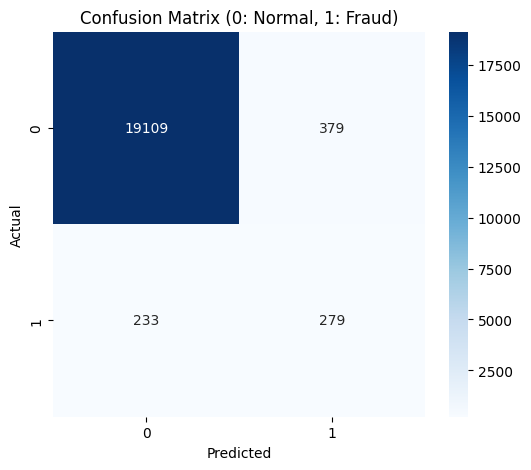

In [7]:
# Prediksi Probabilitas (Bukan cuma 0 atau 1, tapi peluang 0-100%)
y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred = model.predict(X_val)

# Hitung Skor AUC
auc_score = roc_auc_score(y_val, y_pred_proba)
print(f"\n🎯 ROC-AUC Score: {auc_score:.4f}")

# Classification Report
print("\nLaporan Klasifikasi:")
print(classification_report(y_val, y_pred))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (0: Normal, 1: Fraud)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Langkah 7: Prediksi pada Data Test (Submission)

Penjelasan: Sekarang kita gunakan model pintar tadi untuk menilai test_transaction.csv. Hasilnya adalah probabilitas (kemungkinan) sebuah transaksi itu curang. Hasil inilah yang biasanya dikumpulkan dalam kompetisi atau tugas akhir.

In [10]:
# Prediksi pada data Test (Unlabeled)
test_proba = model.predict_proba(test_df)[:, 1]

# Buat DataFrame Submission
submission = pd.DataFrame({
    'TransactionID': test_ids,
    'isFraud': test_proba
})

# Tampilkan contoh hasil
print("\nContoh Hasil Prediksi untuk Data Test:")
display(submission.head())

# Simpan ke CSV (Opsional)
submission.to_csv('submission.csv', index=True)


Contoh Hasil Prediksi untuk Data Test:


,TransactionID,isFraud
0,3663549,0.075082
1,3663550,0.128341
2,3663551,0.177852
3,3663552,0.057661
4,3663553,0.031937
